In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('./data/order.xlsx')
df

,Date,M3
0,2012-01-01,27
1,2012-02-01,37
2,2012-03-01,8
3,2012-04-01,9
4,2012-05-01,11
...,...,...
77,2018-06-01,310
78,2018-07-01,288
79,2018-08-01,190
80,2018-09-01,241


# 기본 데이터 확인


In [4]:
# 샘플도 적고 특징도 매우 적다
df.shape

(82, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    82 non-null     datetime64[ns]
 1   M3      82 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.4 KB


In [6]:
df.isnull().sum()

Date    0
M3      0
dtype: int64

In [7]:
df.describe()

,M3
count,82.000000
mean,82.134146
std,79.807138
min,2.000000
25%,26.250000
50%,53.500000
75%,131.000000
max,393.000000


In [8]:
df['Date'].min(), df['Date'].max() 

(Timestamp('2012-01-01 00:00:00'), Timestamp('2018-10-01 00:00:00'))

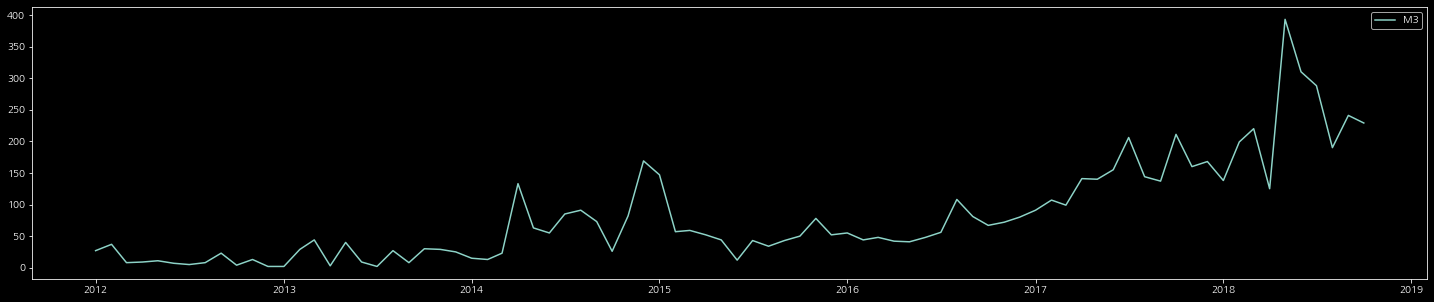

In [9]:
# 전체 기간 Plotting 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date'], df['M3'], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 5)

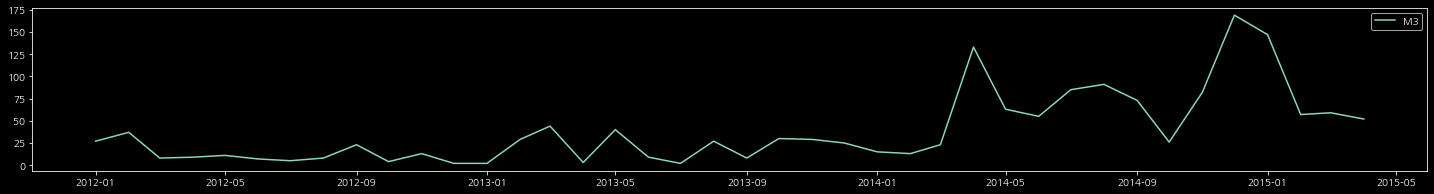

In [10]:
# 일부 기간 Plotting [0:40]
plt.plot(df['Date'][0:40], df['M3'][0:40], label='M3');
plt.legend();
plt.gcf().set_size_inches(25, 3)

In [11]:
# 월 별 비교
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df.head(5)

,Date,M3,year,month
0,2012-01-01,27,2012,1
1,2012-02-01,37,2012,2
2,2012-03-01,8,2012,3
3,2012-04-01,9,2012,4
4,2012-05-01,11,2012,5


In [12]:
# pivot table을 활용 년도벼 월별 자재 발주량 비교
df_pivot = pd.pivot_table(df,                  # 피벗할 데이터프레임
                      index = 'year',          # 행 위치에 들어갈 열
                      columns = 'month',       # 열 위치에 들어갈 열
                      values = 'M3')           # 데이터로 사용할 열 

df_pivot

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2012,27.0,37.0,8.0,9.0,11.0,7.0,5.0,8.0,23.0,4.0,13.0,2.0
2013,2.0,29.0,44.0,3.0,40.0,9.0,2.0,27.0,8.0,30.0,29.0,25.0
2014,15.0,13.0,23.0,133.0,63.0,55.0,85.0,91.0,73.0,26.0,82.0,169.0
2015,147.0,57.0,59.0,52.0,44.0,12.0,43.0,34.0,43.0,50.0,78.0,52.0
2016,55.0,44.0,48.0,42.0,41.0,48.0,56.0,108.0,81.0,67.0,72.0,80.0
2017,91.0,107.0,99.0,141.0,140.0,155.0,206.0,144.0,137.0,211.0,160.0,168.0
2018,138.0,199.0,220.0,125.0,393.0,310.0,288.0,190.0,241.0,229.0,NaN,NaN


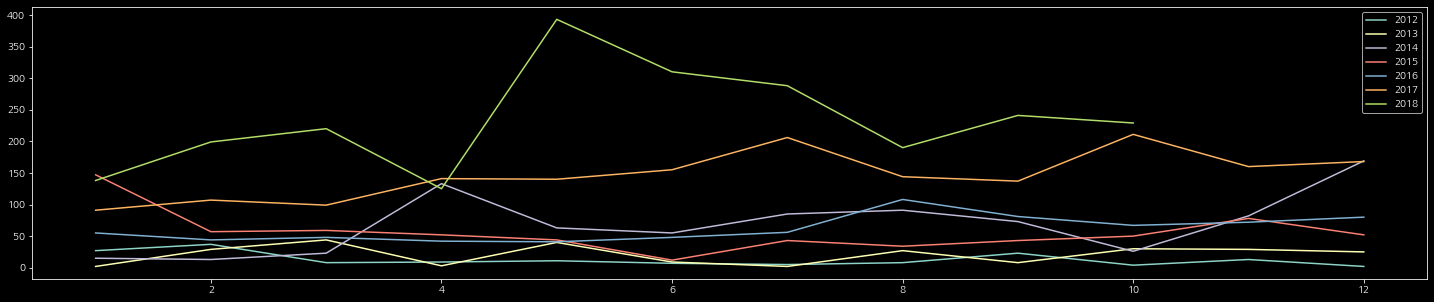

In [13]:
plt.plot(df_pivot.iloc[0,:], label='2012');
plt.plot(df_pivot.iloc[1,:], label='2013');
plt.plot(df_pivot.iloc[2,:], label='2014');
plt.plot(df_pivot.iloc[3,:], label='2015');
plt.plot(df_pivot.iloc[4,:], label='2016');
plt.plot(df_pivot.iloc[5,:], label='2017');
plt.plot(df_pivot.iloc[6,:], label='2018');
plt.legend();
plt.gcf().set_size_inches(25, 5)